# Analysis of an experiment demo

In [2]:
from midastouch.analyzer import Analyzer
import os

Choose an experiment that we want to analyze and load the data:

In [3]:
dir = os.getcwd()
a = Analyzer(datadir=dir+'/experiment_2021-12-17_19_57_58.csv',
            paramdir=dir+'/params_2021-12-17_19_57_58.py')
a.load_data()

The parameters of the algorihtm can be retrieved by the following command:

In [4]:
a.get_parameters()

{'before_after_weights': {'before': 4, 'same time': 1, 'after': 0.5},
 'decay': 'exponential',
 'max_dist': 3,
 'n_investments': 30,
 'cvg_thresh': 0.001}

The following function gives back the top ranked investors. The rank is supposed to represent how 'related' they are to brand-name investors (which have a score of 1 by definition).

In [5]:
a.investor_ranking(top_n=100)

,investor_name,score,distance,investments,neighbors
0,GV,1.000000,0,914,"{'NFX': 7.0, 'REV': 29.0, 'Google': 32.5, 'Zhe..."
1059,CRV,1.000000,0,594,"{'Matrix Partners': 291.0, 'Tudor Growth Equit..."
348,Intel Capital,1.000000,0,1488,"{'TPG Growth': 30.5, 'Sprout Group': 58.5, 'Sa..."
656,Lowercase Capital,1.000000,0,188,"{'Accel': 29, 'EquityZen': 0.5, 'Sands Capital..."
357,Mayfield Fund,1.000000,0,607,"{'Fuse Capital': 38.0, 'Accel': 109, 'Sapphire..."
549,Battery Ventures,1.000000,0,778,"{'ESO Fund': 8.5, 'PremjiInvest': 6.5, 'Icon V..."
2069,Paul Graham,1.000000,0,31,"{'JAM Fund': 0.5, 'Xavier Niel': 1.5, '4DX Ven..."
951,New Enterprise Associates,1.000000,0,1985,"{'J.H. Whitney & Co': 132.0, 'DFJ Growth': 82...."
383,True Ventures,1.000000,0,589,"{'REV': 17.5, 'Intel Capital': 46, 'G Squared'..."
996,Lightspeed Venture Partners,1.000000,0,1053,"{'GIC': 32.5, 'Founders Fund': 88, 'Spark Capi..."


We can also look at how many investors there are between in any range of scores:

In [6]:
bottom_score = 0.3
top_score = 0.4
print(f'There are {a.investor_count(bottom_score=0.3,top_score=0.4)} investors with score between {bottom_score} and {top_score}')

There are 519 investors with score between 0.3 and 0.4


and plot it on a bar chart.

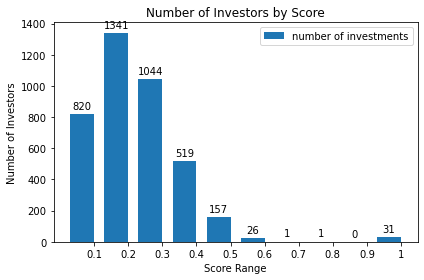

In [7]:
a.investor_count_chart()

Looking at the ranking of a sample of well-known investors is a gut-check of our ranking algorithm. 

In [8]:
a.investor_sample()

,investor_name,score,distance,investments,neighbors
173,Bill Gates,0.454299,1,68,"{'G Squared': 5, 'Alexis Ohanian': 10, 'Pario ..."
2481,Ridge Ventures,0.394869,1,169,"{'Ulu Ventures': 8, 'CRV': 34.0, 'Arbor Ventur..."
2070,Peter Thiel,0.373299,1,87,"{'8VC': 10, 'GV': 10.5, 'Google': 2, 'HOF Capi..."
315,Y Combinator,0.349505,1,4189,"{'Accel': 608.5, 'Stripe': 39, 'Latitude': 5, ..."
3007,Redpoint eventures,0.331240,1,94,"{'500 Startups': 29, 'Founders Fund': 13.5, 'V..."
1219,M12 - Microsoft's Venture Fund,0.330734,1,227,"{'Sapphire': 21, 'DFJ Growth': 20, 'Mayfield F..."
607,WestWave Capital,0.297608,1,62,"{'FOUNDER.org': 4, 'MIG': 8, 'Floodgate': 2.0,..."
1202,Earlybird Venture Capital,0.239465,1,271,"{'Greenspring Associates': 5, 'Saints Capital'..."
251,500 Startups,0.227552,1,2684,"{'Zeroth.AI': 4, 'FBG Capital': 7, '8 Decimal ..."
1155,Commerce Ventures,0.220988,1,131,"{'West Capital Advisors': 6, 'Burch Creative C..."


If one wants to do a further analysis then they can do so by analyzing the full dataset and the full graph of connections which can be obtained by the following commands.

In [11]:
df = a.get_data()

## Choosing a different experiment file

Note, to choose a different experiment, just change the timestamp manually in the second cell. Alternatively, run the following code to choose the file paths

### If you want to choose a different experiment .csv file run the following code

In [7]:
try:
    from tkinter import Tk
    from tkFileDialog import askopenfilenames
except:
    from tkinter import Tk
    from tkinter import filedialog

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenames = filedialog.askopenfilenames() # show an "Open" dialog box and return the path to the selected file

datadir = filenames[0]

### If you want to choose a different params .py file run the following code

In [8]:
try:
    from tkinter import Tk
    from tkFileDialog import askopenfilenames
except:
    from tkinter import Tk
    from tkinter import filedialog

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenames = filedialog.askopenfilenames() # show an "Open" dialog box and return the path to the selected file

paramdir = filenames[0]

In [9]:
a = Analyzer(datadir=datadir, paramdir=paramdir)
a.load_data()

In [10]:
a.get_parameters()

{'before_after_weights': {'before': 1, 'same time': 1, 'after': 1},
 'decay': 'linear',
 'max_dist': 3,
 'n_investments': 30,
 'cvg_thresh': 0.001}

In [11]:
a.investor_ranking(top_n=100)

,investor_name,score,distance,investments,neighbors
0,GV,1.000000,0,914,"{'NFX': 6, 'REV': 14, 'Google': 15, 'ZhenFund'..."
570,General Catalyst,1.000000,0,994,"{'Accel': 198, 'WndrCo': 7, 'Crowdcube': 22, '..."
564,Felicis Ventures,1.000000,0,527,"{'Sapphire': 33, 'Skip Capital': 25, 'Index Ve..."
702,Foundation Capital,1.000000,0,648,"{'DHVC': 23, 'ZhenFund': 2, 'GGV Capital': 25,..."
549,Battery Ventures,1.000000,0,778,"{'ESO Fund': 17, 'PremjiInvest': 6, 'Icon Vent..."
729,Andreessen Horowitz,1.000000,0,1110,"{'Accel': 140, 'Goldman Sachs': 39, 'Index Ven..."
740,First Round Capital,1.000000,0,821,"{'GV': 149, 'TPG Biotech': 20, 'Foresite Capit..."
528,Sequoia Capital,1.000000,0,1601,"{'Alumni Ventures': 13, 'Tenaya Capital': 140,..."
830,Union Square Ventures,1.000000,0,363,"{'SV Angel': 145, 'Lux Capital': 45, 'George B..."
510,Kleiner Perkins,1.000000,0,1310,"{'TCV': 35, 'Accel': 134, 'Focus Ventures': 69..."
